In [23]:
import pandas as pd
import numpy as np
import sqlalchemy
import datetime
import sql_functions as sf
import dotenv
import psycopg2
import matplotlib.pyplot as plt
import seaborn as sns

# 1. DataFrame reading 


In [4]:
df = pd.read_csv("Data/rfm.csv" , index_col=[0])
df.head()

,customer_id,recency,frequency,monetary,recency_score,frequency_score,monetary_score
0,1,24,3,132.4,3,2,3
1,6,71,1,35.6,2,1,1
2,9,142,1,59.8,1,1,2
3,10,119,2,22.4,1,2,1
4,17,10,19,601.8,4,5,5


<Axes: >

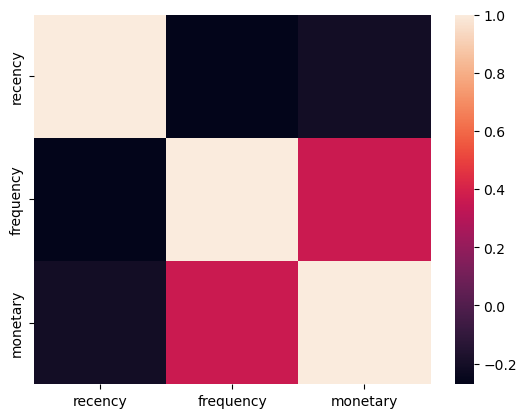

In [5]:
sns.heatmap(df.iloc[: ,1:4].corr())

In [6]:
df.iloc[: , 4:7]

,recency_score,frequency_score,monetary_score
0,3,2,3
1,2,1,1
2,1,1,2
3,1,2,1
4,4,5,5
...,...,...,...
396008,5,2,1
396009,5,2,2
396010,5,2,1
396011,5,2,1


<Axes: >

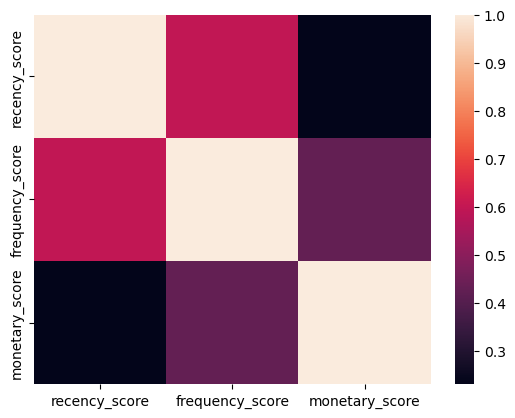

In [7]:
sns.heatmap(df.iloc[: , 4:7].corr())

# 2. Clustering with Scores

/opt/homebrew/Caskroom/miniconda/base/envs/nf_sql/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/homebrew/Caskroom/miniconda/base/envs/nf_sql/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/homebrew/Caskroom/miniconda/base/envs/nf_sql/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/homebrew/Caskroom/miniconda/base/envs/nf_sql/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in

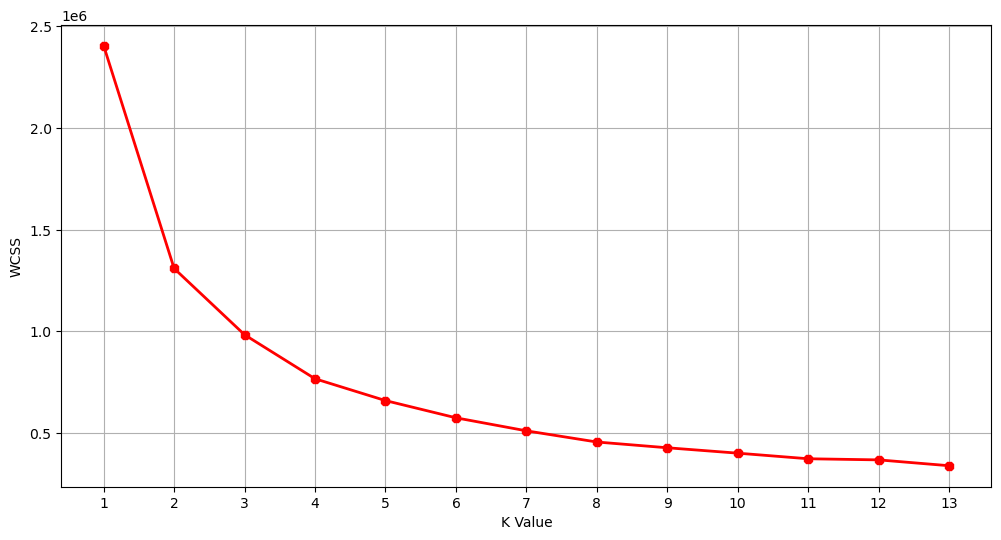

In [8]:
from sklearn.cluster import KMeans
wcss = []
for k in range(1,14):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(df.iloc[:,4:7])
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))    
plt.grid()
plt.plot(range(1,14),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,14,1))
plt.ylabel("WCSS")
plt.show()

/opt/homebrew/Caskroom/miniconda/base/envs/nf_sql/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


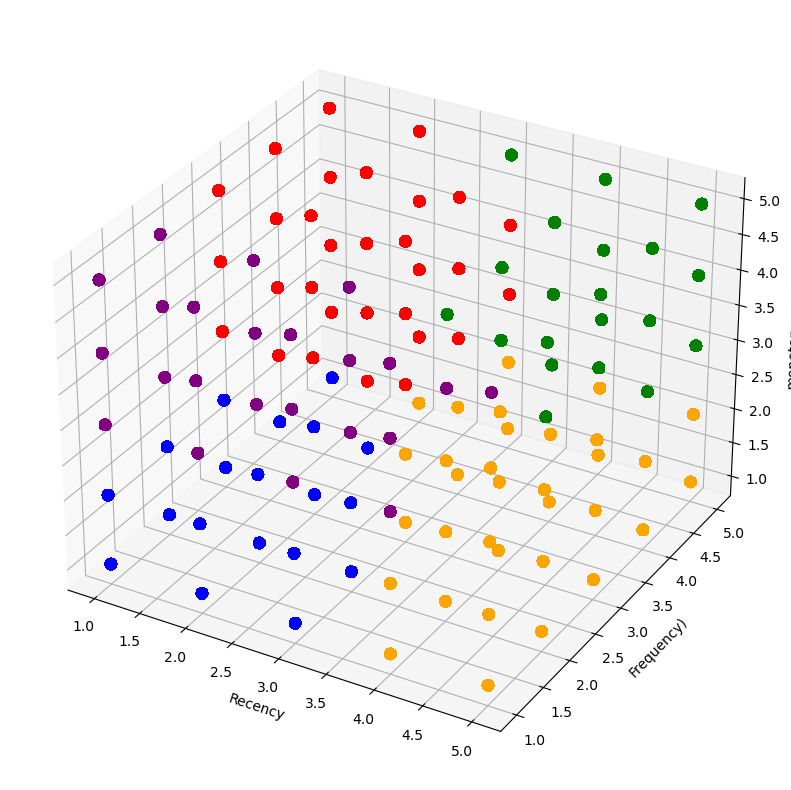

In [48]:
km = KMeans(n_clusters=5)
clusters = km.fit_predict(df.iloc[:,4:7])
df["label"] = clusters

from mpl_toolkits.mplot3d import Axes3D

 
fig = plt.figure(figsize=(40,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df.recency_score[df.label == 0], df["frequency_score"][df.label == 0], df["monetary_score"][df.label == 0], c='blue', s=60)
ax.scatter(df.recency_score[df.label == 1], df["frequency_score"][df.label == 1], df["monetary_score"][df.label == 1], c='red', s=60)
ax.scatter(df.recency_score[df.label == 2], df["frequency_score"][df.label == 2], df["monetary_score"][df.label == 2], c='green', s=60)
ax.scatter(df.recency_score[df.label == 3], df["frequency_score"][df.label == 3], df["monetary_score"][df.label == 3], c='orange', s=60)
ax.scatter(df.recency_score[df.label == 4], df["frequency_score"][df.label == 4], df["monetary_score"][df.label == 4], c='purple', s=60)
plt.xlabel("Recency")
plt.ylabel("Frequency)")
ax.set_zlabel('monetary_score')
plt.show()

In [9]:
df

,customer_id,recency,frequency,monetary,recency_score,frequency_score,monetary_score
0,1,24,3,132.4,3,2,3
1,6,71,1,35.6,2,1,1
2,9,142,1,59.8,1,1,2
3,10,119,2,22.4,1,2,1
4,17,10,19,601.8,4,5,5
...,...,...,...,...,...,...,...
396008,1032838,0,1,11.6,5,2,1
396009,1032841,0,1,63.4,5,2,2
396010,1032845,0,1,48.0,5,2,1
396011,1032848,0,1,35.6,5,2,1


# 3. Clustering with Recency , Frequency and Monetary


/opt/homebrew/Caskroom/miniconda/base/envs/nf_sql/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/homebrew/Caskroom/miniconda/base/envs/nf_sql/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/homebrew/Caskroom/miniconda/base/envs/nf_sql/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/homebrew/Caskroom/miniconda/base/envs/nf_sql/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in

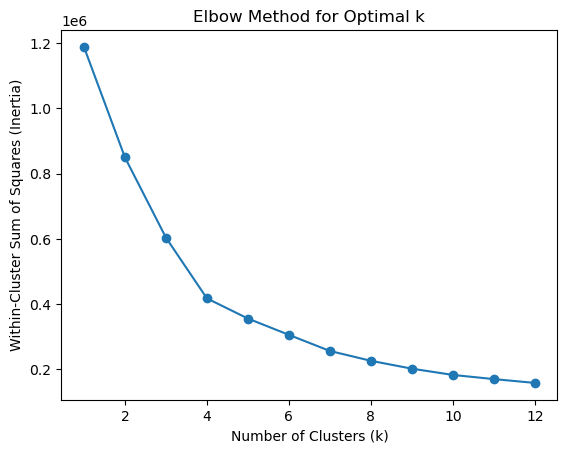

In [10]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


# Select the columns for clustering
columns_for_clustering = ['recency', 'frequency', 'monetary']
X = df[columns_for_clustering]

# Standardize the data to have mean=0 and standard deviation=1
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Calculate the sum of squared distances for different numbers of clusters
inertia = []
max_clusters = 12 

for k in range(1, max_clusters + 1):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_std)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(range(1, max_clusters + 1), inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (Inertia)')
plt.title('Elbow Method for Optimal k')
plt.show()

# From the elbow plot, visually determine the optimal number of clusters and set it as 'optimal_k'
#optimal_k = 3  # Change this value based on your visualization

# Perform KMeans clustering with the chosen number of clusters
#kmeans = KMeans(n_clusters=optimal_k, random_state=42)
#customer_df['Cluster'] = kmeans.fit_predict(X_std)

# The 'Cluster' column now contains the cluster labels for each customer.
#print(customer_df[['Recency', 'Frequency', 'Monetary', 'Cluster']])


In [11]:
optimal_k = 8  # Set the optimal number of clusters here
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_std)

# The 'Cluster' column now contains the cluster labels for each customer.
print(df)

/opt/homebrew/Caskroom/miniconda/base/envs/nf_sql/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


        customer_id  recency  frequency  monetary  recency_score  \
0                 1       24          3     132.4              3   
1                 6       71          1      35.6              2   
2                 9      142          1      59.8              1   
3                10      119          2      22.4              1   
4                17       10         19     601.8              4   
...             ...      ...        ...       ...            ...   
396008      1032838        0          1      11.6              5   
396009      1032841        0          1      63.4              5   
396010      1032845        0          1      48.0              5   
396011      1032848        0          1      35.6              5   
396012      1032851        0          1      50.8              5   

        frequency_score  monetary_score  Cluster  
0                     2               3        0  
1                     1               1        1  
2                     1       

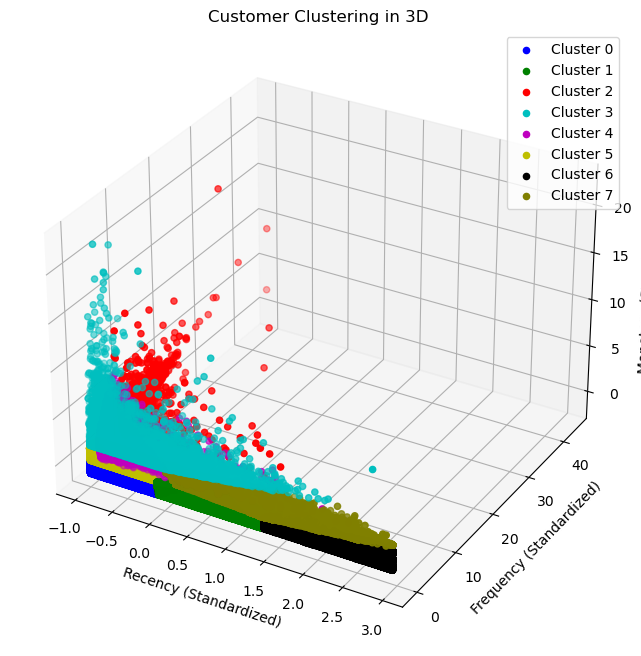

In [70]:
# Plotting the 3D scatter plot
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Create a list of colors for each cluster label
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k' , 'olive']

# Plot each data point with the cluster's color
for cluster_label in range(optimal_k):
    ax.scatter(X_std[df['Cluster'] == cluster_label, 0], 
               X_std[df['Cluster'] == cluster_label, 1], 
               X_std[df['Cluster'] == cluster_label, 2], 
               c=colors[cluster_label], label=f'Cluster {cluster_label}')

ax.set_xlabel('Recency (Standardized)')
ax.set_ylabel('Frequency (Standardized)')
ax.set_zlabel('Monetary (Standardized)')
ax.set_title('Customer Clustering in 3D')
ax.legend()

plt.show()

# 4.Labeling


In [12]:
# looking at each clusters Min, Max and mean
df_cluster_profile=df.groupby('Cluster').agg({
    'customer_id': 'count' ,
    'recency' :['min' , 'max' , 'mean'] , 
    'frequency' :['min' , 'max' , 'mean'] , 
    'monetary' :['min' , 'max' , 'mean'] }).round(2)
df_cluster_profile

customer_id recency              frequency              monetary  \
              count     min  max    mean       min  max    mean      min   
Cluster                                                                    
0            120793       0   56   15.65         1   36    5.03      0.0   
1             78535      42  111   70.96         1   38    2.65      0.6   
2              1843       0   96    2.97        90  625  158.27    108.2   
3             19205       0  171   16.85         2   79   12.75    285.4   
4              8149       0  148    8.44        31  108   54.05     33.0   
5             99126       0   79   15.01         1   35    9.22     82.0   
6             41503     108  184  144.52         1   44    1.54      0.0   
7             26859      48  184   97.96         1   42    2.77    122.6   

                         
            max    mean  
Cluster                  
0         141.4   70.65  
1         170.4   72.99  
2        1979.4  370.10  
3        2464.0  407.63  
4         894.4  250.07  
5         308.6  193.30  
6         232.8   72.56  
7         465.8  219.32

In [13]:
df[['recency' , 'frequency' , 'monetary']].mean().round(2)



recency       45.40
frequency      7.19
monetary     133.53
dtype: float64

In [17]:



# Assigning cluster names based on proposed descriptions
cluster_names = {
    0: "Core",
    1: "Slipping",
    2: "Heros",
    3: "Whales",
    4: "Loyals",
    5: "Emerging",
    6: "Lost" ,
    7: "Inactive"
}

# Map cluster names to the DataFrame
df['Cluster Name'] = df['Cluster'].map(cluster_names)

df_count_by_segment = df.groupby('Cluster Name')['customer_id'].count().reset_index()
df_count_by_segment.columns.values[1] = 'Customer Count'
df_count_by_segment



,Cluster Name,Customer Count
0,Core,120793
1,Emerging,99126
2,Heros,1843
3,Inactive,26859
4,Lost,41503
5,Loyals,8149
6,Slipping,78535
7,Whales,19205


# 5.Result

<Axes: xlabel='Cluster Name'>

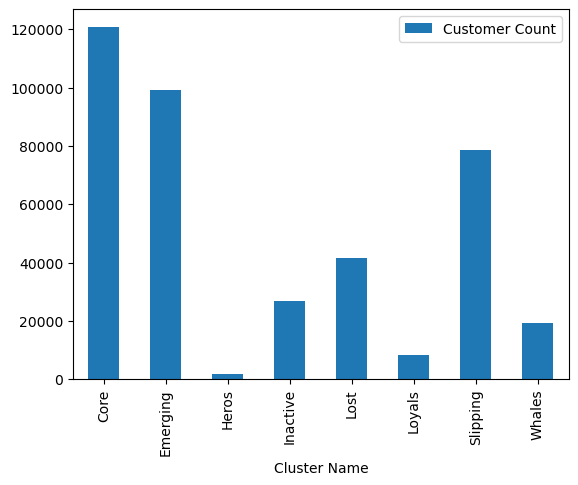

In [18]:
df_count_by_segment.plot(kind='bar' , x='Cluster Name')

In [21]:
df

,customer_id,recency,frequency,monetary,recency_score,frequency_score,monetary_score,Cluster,Cluster Name
0,1,24,3,132.4,3,2,3,0,Core
1,6,71,1,35.6,2,1,1,1,Slipping
2,9,142,1,59.8,1,1,2,6,Lost
3,10,119,2,22.4,1,2,1,6,Lost
4,17,10,19,601.8,4,5,5,3,Whales
...,...,...,...,...,...,...,...,...,...
396008,1032838,0,1,11.6,5,2,1,0,Core
396009,1032841,0,1,63.4,5,2,2,0,Core
396010,1032845,0,1,48.0,5,2,1,0,Core
396011,1032848,0,1,35.6,5,2,1,0,Core


In [34]:
conn=sf.get_engine()
query="select * from information_schema.tables where table_schema='capstone'"

pd.DataFrame(conn.execute(query).fetchall())

,table_catalog,table_schema,table_name,table_type,self_referencing_column_name,reference_generation,user_defined_type_catalog,user_defined_type_schema,user_defined_type_name,is_insertable_into,is_typed,commit_action
0,postgres,capstone,dim_product,BASE TABLE,None,None,None,None,None,YES,NO,None
1,postgres,capstone,raw_table_before,BASE TABLE,None,None,None,None,None,YES,NO,None
2,postgres,capstone,raw_table_after,BASE TABLE,None,None,None,None,None,YES,NO,None
3,postgres,capstone,sales_after,BASE TABLE,None,None,None,None,None,YES,NO,None
4,postgres,capstone,sales_before,BASE TABLE,None,None,None,None,None,YES,NO,None


In [38]:
table_name='Customer_clusters'
Schema_name='capstone'
df.to_sql(table_name, conn, schema=Schema_name , if_exists='replace', index=False )

13

In [40]:
conn.execute("select * from information_schema.tables where table_schema='capstone'").fetchall()

[('postgres', 'capstone', 'dim_product', 'BASE TABLE', None, None, None, None, None, 'YES', 'NO', None),
 ('postgres', 'capstone', 'raw_table_before', 'BASE TABLE', None, None, None, None, None, 'YES', 'NO', None),
 ('postgres', 'capstone', 'Customer_clusters', 'BASE TABLE', None, None, None, None, None, 'YES', 'NO', None),
 ('postgres', 'capstone', 'raw_table_after', 'BASE TABLE', None, None, None, None, None, 'YES', 'NO', None),
 ('postgres', 'capstone', 'sales_after', 'BASE TABLE', None, None, None, None, None, 'YES', 'NO', None),
 ('postgres', 'capstone', 'sales_before', 'BASE TABLE', None, None, None, None, None, 'YES', 'NO', None)]